<a href="https://colab.research.google.com/github/tinachung49/Portfolio/blob/main/QDA_Trading_Strategy_Based_on_ETH_Options_Implied_Volatility_Surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
from scipy.stats import norm, multivariate_normal
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('drive/MyDrive/金融計算/eth_options_iv.csv')
df

,hr_time,expired_date,spot,strikes,call_ivs,put_ivs,call_amounts,put_amounts,expiry,mark_call_prices,mark_put_prices,otm_ivs,otm_amounts
0,2023-09-16 01:00:00+00:00,2023-10-27T08:00:00.000Z,1642.50,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.18, 64.33, 56.97, 49.42, 42.14, 35.3, 3...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 496.0...","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6...",1698393600,"[0, 646.4328959999999, 547.72706, 450.00664, 3...","[1.314416, 2.299864, 3.613192, 5.5840239999999...","[79.64, 72.18, 64.33, 56.97, 49.42, 42.14, 35....","[71.0, 114.0, 48.0, 1.0, 828.0, 422.0, 80.0, 6..."
1,2023-09-16 02:00:00+00:00,2023-10-27T08:00:00.000Z,1643.92,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.76, 64.33, 57.03, 48.81, 42.12, 35.21, ...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 316.0...","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ...",1698393600,"[0, 647.1079119999999, 548.7980399999999, 451....","[1.150219, 2.136173, 3.4508039999999998, 5.587...","[78.51, 71.76, 64.33, 57.03, 48.81, 42.12, 35....","[43.0, 156.0, 46.0, 1.0, 337.0, 412.0, 248.0, ..."
2,2023-09-16 03:00:00+00:00,2023-10-27T08:00:00.000Z,1647.08,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.91, 64.64, 57.53, 49.21, 42.09, 35.46, ...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 168.0, 854.0...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8...",1698393600,"[0, 650.945776, 552.447402, 454.79192, 357.440...","[1.152984, 2.141542, 3.4589519999999996, 5.600...","[78.94, 71.9, 64.64, 57.53, 49.21, 42.11, 35.4...","[43.0, 40.0, 48.0, 2.0, 368.0, 387.0, 205.0, 8..."
3,2023-09-16 04:00:00+00:00,2023-10-27T08:00:00.000Z,1642.34,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 72.0, 64.49, 57.15, 48.86, 41.65, 35.09, 3...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 169.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97....",1698393600,"[0, 646.130935, 547.6103350000001, 449.9107400...","[1.149372, 2.298744, 3.612422, 5.5826639999999...","[78.67, 72.0, 64.49, 57.15, 48.86, 41.65, 35.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 528.0, 254.0, 97...."
4,2023-09-16 05:00:00+00:00,2023-10-27T08:00:00.000Z,1639.75,"[900, 1000, 1100, 1200, 1300, 1400, 1500, 1600...","[0, 71.78, 64.35, 57.02, 48.65, 41.82, 35.05, ...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 170.0, 235.0...","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117...",1698393600,"[0, 644.2391359999999, 545.8319359999999, 448....","[1.1480629999999998, 2.1321169999999996, 3.608...","[78.57, 71.82, 64.35, 57.01, 48.66, 41.82, 35....","[43.0, 40.0, 48.0, 2.0, 1.0, 547.0, 277.0, 117..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17477,2024-05-31 04:00:00+00:00,2024-05-31T08:00:00.000Z,68536.00,"[53000, 54000, 55000, 56000, 57000, 58000, 590...","[0, 0, 0, 123.51, 123.51, 123.51, 123.09, 122....","[123.93, 123.51, 123.51, 123.51, 123.51, 123.5...","[0, 0, 0, 70.0, 0.6, 70.8, 70.8, 70.3, 0.2, 0....","[4.1, 0.3, 0.3, 1.0, 25.1, 1.8, 1.0, 0.3, 1.0,...",1717142400,"[0, 0, 0, 12555.710927999999, 11555.0920439999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[123.93, 123.51, 123.51, 123.51, 123.51, 123.5...","[4.1, 0.3, 0.3, 1.0, 25.1, 1.8, 1.0, 0.3, 1.0,..."
17478,2024-05-31 05:00:00+00:00,2024-05-31T08:00:00.000Z,3762.32,"[3000, 3100, 3200, 3300, 3400, 3500, 3600, 370...","[0, 0, 152.85, 143.69, 125.21, 113.84, 80.73, ...","[162.61, 162.6, 152.85, 143.69, 125.21, 113.84...","[0, 0, 1050.0, 1050.0, 1050.0, 1050.0, 1050.0,...","[11.0, 186.0, 47.0, 34.0, 186.0, 73.0, 6.0, 76...",1717142400,"[0, 0, 564.375, 464.256714, 364.540707, 264.48...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.752412, ...","[162.61, 162.6, 152.85, 143.69, 125.21, 113.84...","[11.0, 186.0, 47.0, 34.0, 186.0, 73.0, 6.0, 76..."
17479,2024-05-31 0

In [4]:
df['hr_time'] = pd.to_datetime(df['hr_time'])
df = df.sort_values(by='hr_time').reset_index(drop=True)

# Black-Scholes Formula
def bls(s,k,r,t,sig):
    if t <= 0 or sig <= 0: return 0, 0
    d1 = (np.log(s/k) + (r+sig**2/2)*t)/(sig*np.sqrt(t))
    d2 = (np.log(s/k) + (r-sig**2/2)*t)/(sig*np.sqrt(t))
    call = s * norm.cdf(d1) - k * np.exp(-r*t) * norm.cdf(d2)
    put = k * np.exp(-r*t) * norm.cdf(-d2) - s * norm.cdf(-d1)
    return call, put

# Label Generation Function (Using spot price time series)
def get_market_label(current_S0, future_S):
    """ Generate classification labels based on future price returns. (t')。 """
    if np.isnan(future_S) or future_S == 0:
        return 0

    returns = (future_S - current_S0) / current_S0

    # Define classification thresholds
    UPPER_THRESHOLD = 0.0015
    LOWER_THRESHOLD = -0.0015

    if returns > UPPER_THRESHOLD:
        return 1 # Class 1: Bullish / Upward
    elif returns < LOWER_THRESHOLD:
        return 3 # Class 3: Bearish / Downward
    else:
        return 2 # Class 2: Sideways / Neutral


In [5]:
N_HOURS = 4
df['Future_S'] = df['spot'].shift(-N_HOURS)

features_list = []
labels_list = []
N = len(df)

print(f"Processing {N} records (Prediction horizon: {N_HOURS} hours)...")

for i in range(N):
    try:
        row = df.loc[i]

        # Label Generation (Threshold: 0.15%)
        returns = (row['Future_S'] - row['spot']) / row['spot']
        UPPER_THRESHOLD = 0.003
        LOWER_THRESHOLD = -0.0015

        if np.isnan(row['Future_S']) or row['Future_S'] == 0:
            current_label = 0
        elif returns > UPPER_THRESHOLD:
            current_label = 1 # Up
        elif returns < LOWER_THRESHOLD:
            current_label = 3 # Down
        else:
            current_label = 2 # Neutral

        if current_label == 0 or row['expiry'] <= row['hr_time'].timestamp():
             continue

        # Data Preparation for Wing Model Fitting
        K = np.array(eval(row['strikes']))
        otm_iv = np.array(eval(row['otm_ivs']))

        valid_iv_indices = otm_iv > 1e-5
        K_clean = K[valid_iv_indices]
        otm_iv_clean = otm_iv[valid_iv_indices]

        if len(K_clean) < 3:
             continue

        # Wing Model Calibration
        A = np.array([np.ones(len(K_clean)), K_clean, np.square(K_clean)]).T
        ols_coef = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(otm_iv_clean)

        # Feature Storage: Adding ATM IV as the 3rd Feature
        idx_atm = (np.abs(K_clean - row['spot'])).argmin()
        atm_iv = otm_iv_clean[idx_atm]

        features_list.append([ols_coef[1], ols_coef[2], atm_iv])
        labels_list.append(current_label)

    except Exception:
        continue

X = np.array(features_list)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled

t = np.array(labels_list)

print(f"Total valid observations for training: {len(X)}")

Processing 17482 records (Prediction horizon: 4 hours)...
Total valid observations for training: 17431


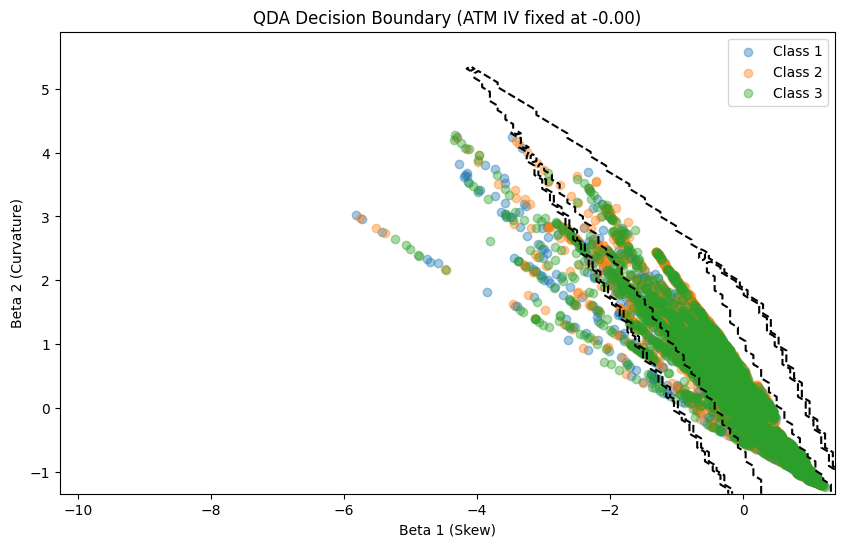

In [6]:
unique_labels = np.unique(t)
# Train-Test Split
split_idx = int(len(X) * 0.7)
X_train, X_test = X[:split_idx], X[split_idx:]
t_train, t_test = t[:split_idx], t[split_idx:]

class_means = {}
class_covs = {}
class_priors = {}

valid_labels = [label for label in unique_labels if np.sum(t_train == label) >= 2]

for label in valid_labels:
    X_k = X_train[t_train == label]
    class_means[label] = np.mean(X_k, axis=0)
    class_covs[label] = np.cov(X_k, rowvar=False)
    class_priors[label] = len(X_k) / len(X_train)

# Plotting
avg_atm_iv = X[:, 2].mean()
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x1 = np.linspace(x1_min, x1_max, 101)
x2 = np.linspace(x2_min, x2_max, 101)
X1_grid, X2_grid = np.meshgrid(x1, x2)
flat_grid = np.c_[X1_grid.ravel(), X2_grid.ravel(), np.full(X1_grid.size, avg_atm_iv)]

Z_probs = {label: [] for label in valid_labels}
for point in flat_grid:
    denominator = sum(class_priors[l] * multivariate_normal.pdf(point, class_means[l], class_covs[l], allow_singular=True) for l in valid_labels)
    for label in valid_labels:
        num = class_priors[label] * multivariate_normal.pdf(point, class_means[label], class_covs[label], allow_singular=True)
        Z_probs[label].append(num / denominator if denominator > 1e-10 else 0)

Z_max = np.argmax([np.array(Z_probs[l]).reshape(X1_grid.shape) for l in valid_labels], axis=0)

plt.figure(figsize=(10, 6))
for label in valid_labels:
    plt.scatter(X_train[t_train == label, 0], X_train[t_train == label, 1], alpha=0.4, label=f'Class {label}')
plt.contour(X1_grid, X2_grid, Z_max, levels=np.arange(len(valid_labels)) + 0.5, colors='k', linestyles='--')
plt.title(f"QDA Decision Boundary (ATM IV fixed at {avg_atm_iv:.2f})")
plt.xlabel("Beta 1 (Skew)")
plt.ylabel("Beta 2 (Curvature)")
plt.legend()
plt.show()


--- Backtesting report ---
accuracy_score: 29.39%
              precision    recall  f1-score   support

          Up       0.34      0.28      0.31      1787
     Neutral       0.23      0.36      0.28      1316
        Down       0.33      0.27      0.29      2127

    accuracy                           0.29      5230
   macro avg       0.30      0.30      0.29      5230
weighted avg       0.31      0.29      0.30      5230



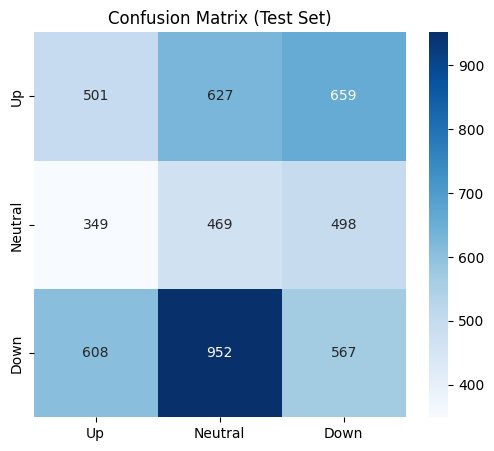

In [7]:
# Backtesting

def predict_qda(x, means, covs, priors):
    probs = {l: priors[l] * multivariate_normal.pdf(x, means[l], covs[l], allow_singular=True) for l in means.keys()}
    return max(probs, key=probs.get) if sum(probs.values()) > 0 else 2

predictions = np.array([predict_qda(x, class_means, class_covs, class_priors) for x in X_test])

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print("\n--- Backtesting report ---")
print(f"accuracy_score: {accuracy_score(t_test, predictions):.2%}")
print(classification_report(t_test, predictions, target_names=['Up', 'Neutral', 'Down'], zero_division=0))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(t_test, predictions), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Up', 'Neutral', 'Down'], yticklabels=['Up', 'Neutral', 'Down'])
plt.title("Confusion Matrix (Test Set)")
plt.show()

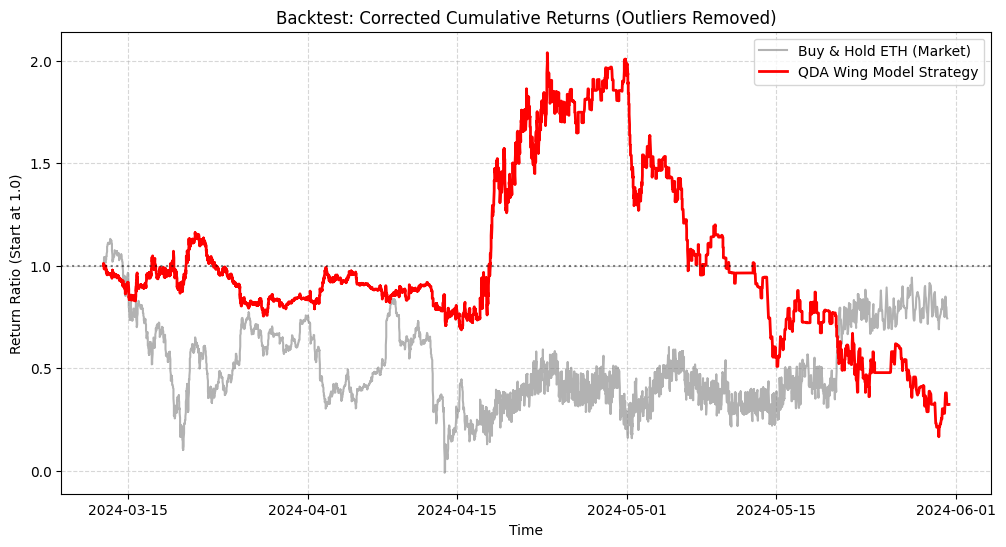


--- Strategy Performance Summary ---
Total Return during Test Period: -67.57%
Strategy Win Rate (Excluding Neutral instances): 49.48%


In [8]:
# Prepare Return Data and Winsorization (Outlier Handling)
# Extract raw returns corresponding to the test set
test_df = df.iloc[len(df)-len(X_test):].copy()
test_df['pred'] = predictions

raw_returns = (test_df['Future_S'] - test_df['spot']) / test_df['spot']
test_df['actual_return'] = raw_returns.clip(lower=-0.05, upper=0.05)

# Calculate Strategy Returns-
# Strategy Logic: Buy when predicting "Up" (1), Sell (Short) when predicting "Down" (3), and Hold/No Position for others (2)
def calc_strategy_return(row):
    if row['pred'] == 1:
        return row['actual_return']
    elif row['pred'] == 3:
        return -row['actual_return']
    else:
        return 0

test_df['strategy_return'] = test_df.apply(calc_strategy_return, axis=1)

# Calculate cumulative returns (using Simple Returns summation via Cumulative Sum)
test_df['cum_market'] = test_df['actual_return'].cumsum()
test_df['cum_strategy'] = test_df['strategy_return'].cumsum()

# Plot Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(test_df['hr_time'], 1 + test_df['cum_market'], label='Buy & Hold ETH (Market)', color='gray', alpha=0.6)
plt.plot(test_df['hr_time'], 1 + test_df['cum_strategy'], label='QDA Wing Model Strategy', color='red', linewidth=2)

# Plot a horizontal line representing the initial capital level
plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5)
plt.title("Backtest: Corrected Cumulative Returns (Outliers Removed)")
plt.xlabel("Time")
plt.ylabel("Return Ratio (Start at 1.0)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Summary of Performance Metrics
total_ret_pct = test_df['strategy_return'].sum() * 100
# Calculate the win rate by excluding instances where the model remained "Neutral" (no entry)
active_trades = test_df[test_df['strategy_return'] != 0]
win_rate = (active_trades['strategy_return'] > 0).sum() / len(active_trades) if len(active_trades) > 0 else 0

print(f"\n--- Strategy Performance Summary ---")
print(f"Total Return during Test Period: {total_ret_pct:.2f}%")
print(f"Strategy Win Rate (Excluding Neutral instances): {win_rate:.2%}")

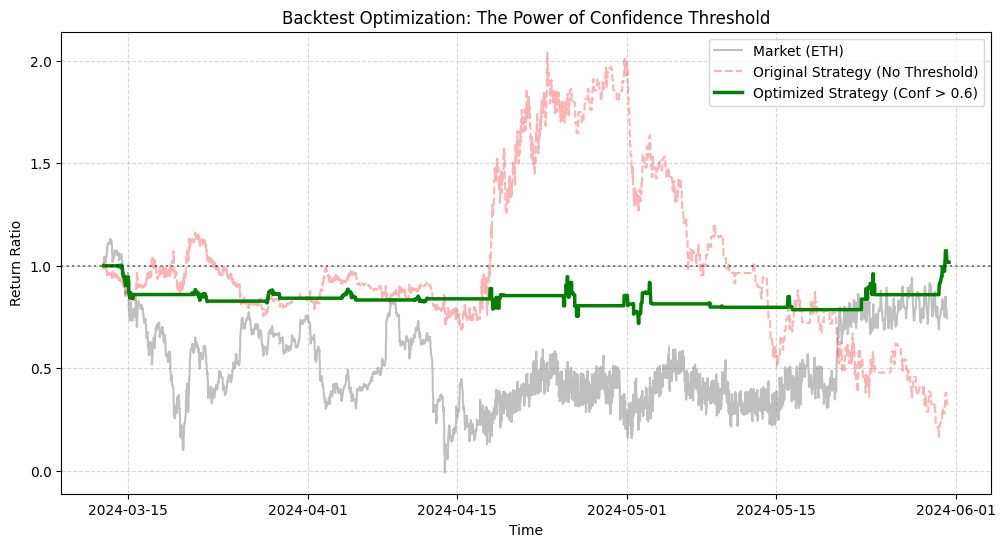

--- Strategy Performance Summary (Confidence Threshold: 60%) ---
Original Strategy Returns: -67.57% (Number of Trades: 3182)
Optimized Strategy Returns: 1.72% (Number of Trades: 257)


In [9]:
# Define Prediction Function with Confidence Threshold
def predict_with_confidence(x, means, covs, priors, threshold=0.6):
    """
    Issue "Up" or "Down" signals only when the maximum class probability exceeds the threshold;
    otherwise, default to "Neutral" (2)
    """
    probs = {}
    for l in means.keys():
        try:
            # PDF
            pdf_val = multivariate_normal.pdf(x, means[l], covs[l], allow_singular=True)
            probs[l] = pdf_val * priors[l]
        except:
            probs[l] = 0

    total_prob = sum(probs.values())
    if total_prob == 0:
        return 2

    # Calculate probability percentages for each class
    prob_dist = {l: p / total_prob for l, p in probs.items()}
    best_label = max(prob_dist, key=prob_dist.get)
    best_prob = prob_dist[best_label]

    # Reclassify "Up" (1) or "Down" (3) to "Neutral" (2) if the model's confidence is insufficient
    if best_label in [1, 3] and best_prob < threshold:
        return 2
    return best_label

# Backtest (Confidence Threshold = 60%)
CONFIDENCE_LEVEL = 0.6
conf_predictions = np.array([
    predict_with_confidence(x, class_means, class_covs, class_priors, threshold=CONFIDENCE_LEVEL)
    for x in X_test
])

# Calculate Optimized Returns
test_df['pred_conf'] = conf_predictions

def calc_strategy_return_conf(row):
    # Strategy Logic: Execute trades based solely on high-confidence predictions
    if row['pred_conf'] == 1:    # Predicting Significant Upward Movement
        return row['actual_return']
    elif row['pred_conf'] == 3:   # Predicting Significant Downward Movement
        return -row['actual_return']
    else:                # Insufficient Confidence or Market Consolidation -> Wait-and-See
        return 0

test_df['strat_ret_conf'] = test_df.apply(calc_strategy_return_conf, axis=1)
test_df['cum_strat_conf'] = test_df['strat_ret_conf'].cumsum()

# Plot Comparative Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_df['hr_time'], 1 + test_df['cum_market'], label='Market (ETH)', color='gray', alpha=0.5)
plt.plot(test_df['hr_time'], 1 + test_df['cum_strategy'], label='Original Strategy (No Threshold)', color='red', alpha=0.3, linestyle='--')
plt.plot(test_df['hr_time'], 1 + test_df['cum_strat_conf'], label=f'Optimized Strategy (Conf > {CONFIDENCE_LEVEL})', color='green', linewidth=2.5)

plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5)
plt.title("Backtest Optimization: The Power of Confidence Threshold")
plt.xlabel("Time")
plt.ylabel("Return Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Metrics Comparison
orig_ret = test_df['strategy_return'].sum() * 100
conf_ret = test_df['strat_ret_conf'].sum() * 100
trade_count_orig = (test_df['pred'] != 2).sum()
trade_count_conf = (test_df['pred_conf'] != 2).sum()

print(f"--- Strategy Performance Summary (Confidence Threshold: {CONFIDENCE_LEVEL:.0%}) ---")
print(f"Original Strategy Returns: {orig_ret:.2f}% (Number of Trades: {trade_count_orig})")
print(f"Optimized Strategy Returns: {conf_ret:.2f}% (Number of Trades: {trade_count_conf})")

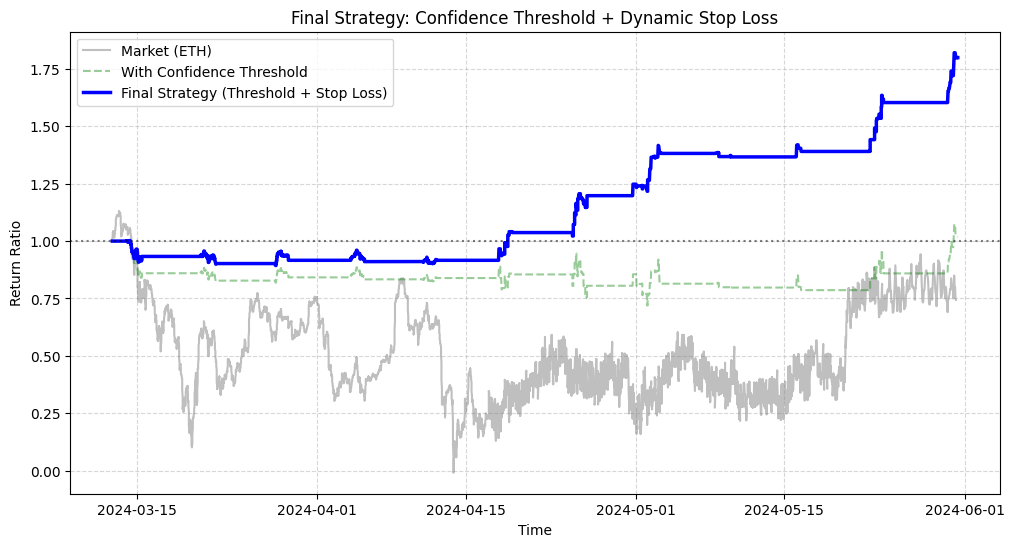

--- Strategy Performance Summary ---
Returns from Confidence-Threshold Strategy: 1.72%
Returns with Stop-Loss Mechanism: 79.91%


In [10]:
# Define Return Function with Confidence Threshold and Stop-Loss Mechanism
STOP_LOSS_LIMIT = -0.015  # Set at -1.5%; trigger stop-loss once the loss exceeds this threshold

def calc_strategy_return_stop_loss(row):
    # Apply only to high-confidence predictions (1 or 3)
    pred = row['pred_conf']
    actual_ret = row['actual_return']

    if pred == 1:    # Long
        # If the loss exceeds the stop-loss limit, cap the return at the stop-loss value
        return max(actual_ret, STOP_LOSS_LIMIT)
    elif pred == 3:   # Short
        # Short-position loss is -actual_ret; trigger stop-loss if it falls below the limit
        # e.g., If the price rises by 2%, the short loss is -2%, which is then capped at -1.5%
        return max(-actual_ret, STOP_LOSS_LIMIT)
    else:
        return 0

# Backtest
test_df['strat_ret_final'] = test_df.apply(calc_strategy_return_stop_loss, axis=1)
test_df['cum_strat_final'] = test_df['strat_ret_final'].cumsum()

# Plot Comparative Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_df['hr_time'], 1 + test_df['cum_market'], label='Market (ETH)', color='gray', alpha=0.5)
plt.plot(test_df['hr_time'], 1 + test_df['cum_strat_conf'], label='With Confidence Threshold', color='green', alpha=0.4, linestyle='--')
plt.plot(test_df['hr_time'], 1 + test_df['cum_strat_final'], label=f'Final Strategy (Threshold + Stop Loss)', color='blue', linewidth=2.5)

plt.axhline(y=1.0, color='black', linestyle=':', alpha=0.5)
plt.title("Final Strategy: Confidence Threshold + Dynamic Stop Loss")
plt.xlabel("Time")
plt.ylabel("Return Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Summary of Performance Metrics
final_ret = test_df['strat_ret_final'].sum() * 100
print(f"--- Strategy Performance Summary ---")
print(f"Returns from Confidence-Threshold Strategy: {conf_ret:.2f}%")
print(f"Returns with Stop-Loss Mechanism: {final_ret:.2f}%")